# Tensorboard using tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorboard
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


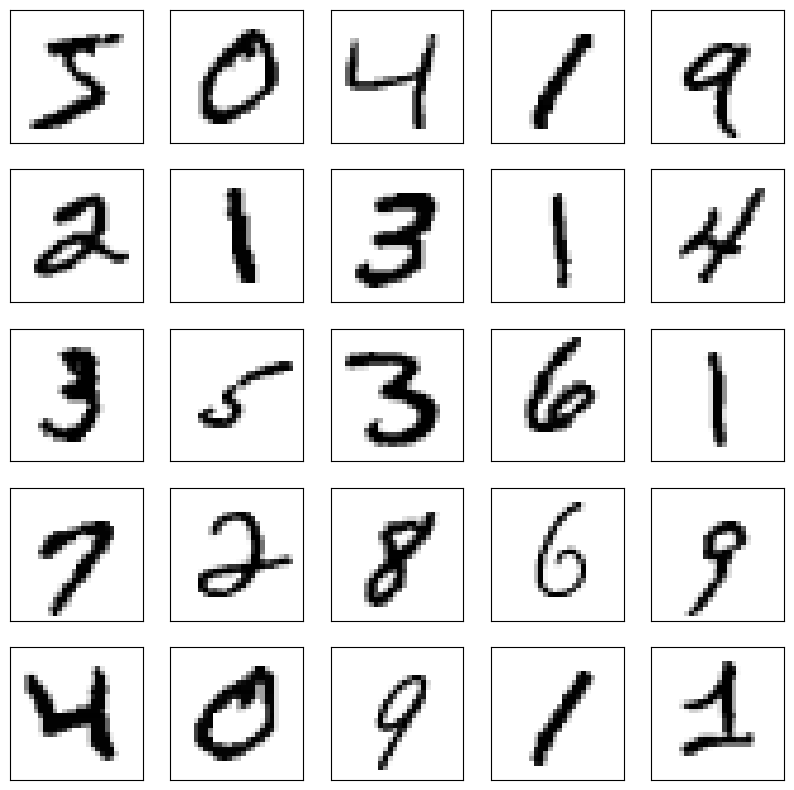

In [3]:
# show the first 25 images in the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()



In [4]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.callbacks import TensorBoard
# import datetime

# # Load and preprocess dataset (using CIFAR-10 as an example)
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

# # Build a simple CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
#     MaxPooling2D((2,2)),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Set up TensorBoard callback
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# # Train the model with TensorBoard callback
# history = model.fit(x_train, y_train,
#                     epochs=10,
#                     validation_data=(x_test, y_test),
#                     callbacks=[tensorboard_callback])

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
# print("Test Accuracy:", test_accuracy)

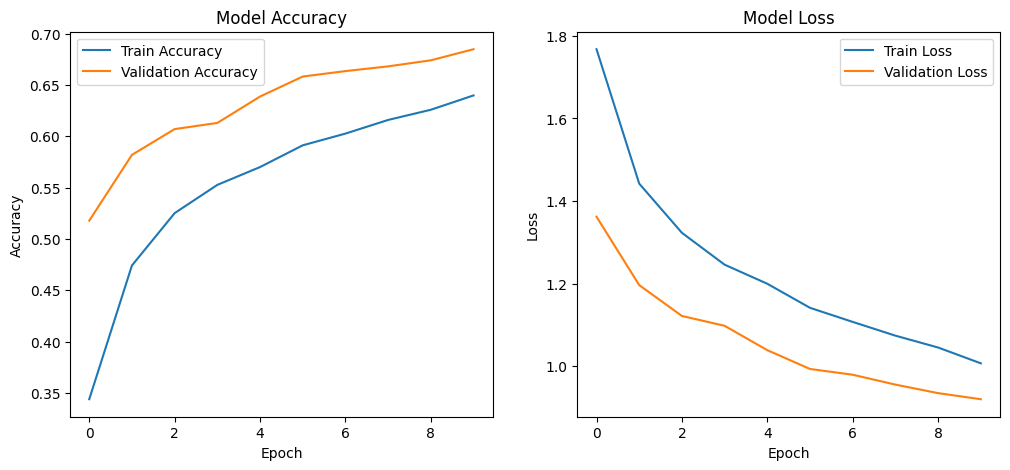

In [ ]:
# # Plot test accuracy
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')
# plt.legend()

# # Plot validation loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Model Loss')
# plt.legend()

# plt.show()

In [5]:
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
# from tensorflow.keras.optimizers import Adam

# # Load the VGG16 model with pre-trained weights, excluding the top layers
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# # Freeze the base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom top layers
# x = base_model.output
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(10, activation='softmax')(x)

# # Create the new model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model with TensorBoard callback
# history = model.fit(x_train, y_train,
#                     epochs=10,
#                     validation_data=(x_test, y_test),
#                     callbacks=[tensorboard_callback])

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
# print("Test Accuracy:", test_accuracy)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Load and preprocess dataset (using CIFAR-10 as an example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

# Load the VGG16 model with pre-trained weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])

# Unfreeze some of the top layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(x_train, y_train,
                             epochs=10,
                             validation_data=(x_test, y_test),
                             callbacks=[tensorboard_callback])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1563/1563 [==============================] - 156s 99ms/step - loss: 1.8517 - accuracy: 0.3427 - val_loss: 1.5293 - val_accuracy: 0.4858
Epoch 2/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.5223 - accuracy: 0.4700 - val_loss: 1.4046 - val_accuracy: 0.5194
Epoch 3/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.4235 - accuracy: 0.5029 - val_loss: 1.3399 - val_accuracy: 0.5364
Epoch 4/10
1563/1563 [==============================] - 177s 113ms/step - loss: 1.3669 - accuracy: 0.5232 - val_loss: 1.3005 - val_accuracy: 0.5501
Epoch 5/10
1563/1563 [==============================] - 203s 130ms/step - loss: 1.3249 - accuracy: 0.5408 - val_loss: 1.2712 - val_accuracy: 0.5590
Epoch 6/10
1563/1563 [==============================] - 223s 142ms/step - loss: 1.2945 - accuracy: 0.5496 - val_loss: 1.2522 - val_accuracy: 0.5659
Epoch 7/10
1563/1563 [==============================] - 197s 126ms/step - loss: 1.2690 - accuracy: 0.5577 - val_l